In [1]:
import networkx as nx
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np

**E2.1  Shortest Paths and Cycles**


In [2]:
G=nx.read_graphml("../data/visualization/small_graph.xml", node_type=int)#Load the graph

a) How many nodes and ages does G have?

In [3]:
nodes = G.number_of_nodes()
edges = G.number_of_edges()
print("b) The graph has %d nodes and %d edges\n"%(nodes,edges))

b) The graph has 132 nodes and 190 edges



b) How many cycles does the cycle basis of the graph contain? How Many
edges does the longest cycle in the cycle basis have?


In [4]:
basis = nx.cycle_basis(G)
entry_length = [len(entry) for entry in basis]
print("c) The cycle basis of the graph contains %d entries, the longest entry contains %d edges.\n"\
%(len(basis),np.asarray(entry_length).max()))


c) The cycle basis of the graph contains 59 entries, the longest entry contains 31 edges.



c) Create a small graph using G.add nodes from() and G.add edges from()
containing about 5-10 nodes and edges. Check if the graph has a planar
embedding using the following check for planarity:


In [5]:
# function checks if graph G has K (5) or K (3 ,3) as minors ,
# returns True / False on planarity
import itertools as it
from networkx.algorithms import bipartite
def is_planar ( G ):
    result = True
    n = len ( G . nodes ())
    if n > 5:
        for subnodes in it . combinations ( G . nodes () ,6):
            subG = G . subgraph ( subnodes )
            # check if the graph G has a subgraph K (3 ,3)
            if bipartite.is_bipartite ( G ):
                X , Y = bipartite . sets ( G )
                if len ( X )==3:
                    result = False
    if n > 4 and result :
        for subnodes in it . combinations ( G . nodes () ,5):
            subG = G . subgraph ( subnodes )
            # check if the graph G has a subgraph K (5)
            if len ( subG . edges ())==10:
                result = False
    return result


In [6]:
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5])
H.add_edges_from([(1,2),(1,4),(2,3),(3,4),(3,5),(4,5)])

is_planar(H)

True

d) Select two (random) nodes in the graph and calculate the length of the
shortest path between them.


In [7]:
node1 = np.random.random_integers(0,nodes)
node2 = np.random.random_integers(0,nodes)
path = nx.shortest_path(G, node1, node2)
print("e) The shortest path between node %d and node %d contains %d edges.\n"\
%(node1, node2, len(path)))

e) The shortest path between node 23 and node 66 contains 3 edges.



e)  What is the greatest distance between any pair of vertices? (Longest
shortest path/diameter)



In [8]:
diameter = nx.diameter(G)
print("f) The diameter of the graph is %d.\n"%diameter)

f) The diameter of the graph is 15.



f)  Select one node in the graph. Create and plot a histogram of the shortest
paths from this node to every other node.


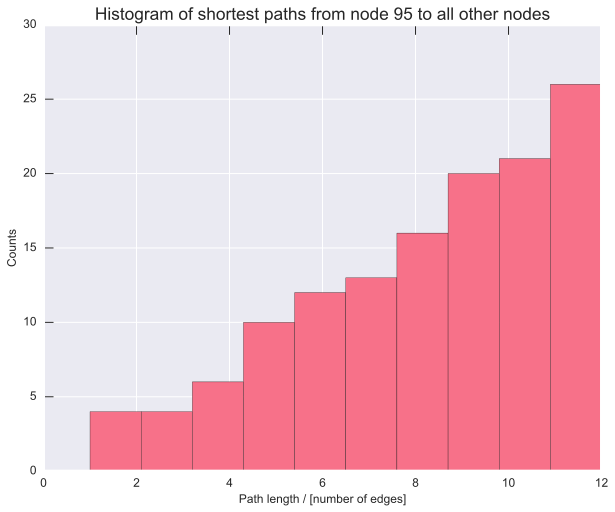

In [9]:
path_lengths = []
start = np.random.random_integers(0,nodes)
path_lengths = [len(nx.shortest_path(G,start,end)) for end in G.nodes()]

plt.title("Histogram of shortest paths from node %d to all other nodes"%start)
plt.xlabel("Path length / [number of edges]")
plt.ylabel("Counts")
plt.hist(path_lengths)
plt.show()

**E2.2 Edge and Node Attributes** 

a) Which node/edge attributes does the graph have?

In [10]:
node_attribute_dict = G.node[0]
edge_attribute_dict = G.edge[0][16]
print("a) The graph has the node attributes",node_attribute_dict.keys())
print("a) The graph has the edge attributes",edge_attribute_dict.keys())

a) The graph has the node attributes dict_keys(['x', 'radius', 'y'])
a) The graph has the edge attributes dict_keys(['radius'])


b) Using the node attributes calculate the total length of the graph.

In [11]:
length = 0
for e in G.edges():
    x1 = G.node[e[0]]['x']
    x2 = G.node[e[1]]['x']
    y1 = G.node[e[0]]['y']
    y2 = G.node[e[1]]['y']
    length += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
print("\nb) The total length of the graph is %d.\n"%length)


b) The total length of the graph is 19138.



c) Using the lengths calculated in c) create a new edge attribute called
“length” for each edge. Calculate the length of the graph again using
the new edge attribute.


In [12]:
for e in G.edges():
    x1 = G.node[e[0]]['x']
    x2 = G.node[e[1]]['x']
    y1 = G.node[e[0]]['y']
    y2 = G.node[e[1]]['y']
    length = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    G.edge[e[0]][e[1]].update({'length':length})
print("c) The graph has the edge attributes",edge_attribute_dict.keys())
length = 0
for e in G.edges(data=True):
    length += e[2]['length']

edge_attribute_dict = G.edge[0][16]    
print("c) The total length of the graph is %d.\n"%length)

c) The graph has the edge attributes dict_keys(['length', 'radius'])
c) The total length of the graph is 19138.



d) Create and plot a histogram of edge lengths.


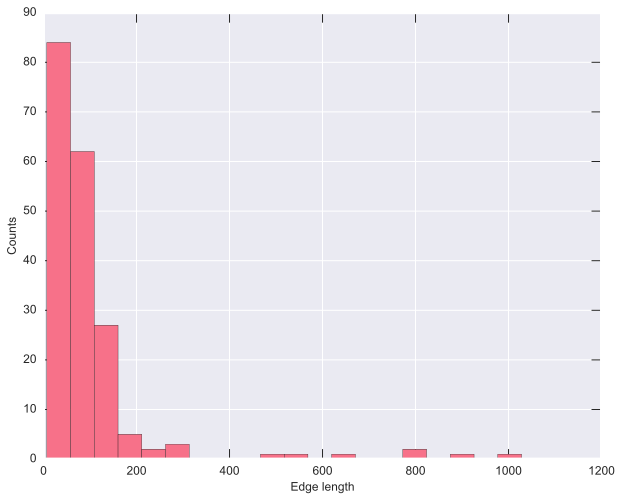

In [13]:
edge_lengths = [e[2]['length'] for e in G.edges(data=True)]
plt.clf()
plt.xlabel("Edge length")
plt.ylabel("Counts")
plt.hist(edge_lengths,bins=20)
plt.show()